### Imports

In [1]:
# Import libraries needed for modeling
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

### Load Data

In [2]:
df = pd.read_csv('../data/df_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     7620 non-null   int64 
 1   title         7620 non-null   object
 2   author        7620 non-null   object
 3   num_comments  7620 non-null   int64 
 4   text          7620 non-null   object
 5   text_cleaned  7587 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.3+ KB


In [4]:
# fillter data with value = NaN
bool_series = pd.isnull(df["text_cleaned"])

In [5]:
# Nan value due to the text cleaning that returned no words
df[bool_series]

,subreddit,title,author,num_comments,text,text_cleaned
136,1,https://moneysocial-huk.buzz/57371695859503,Choice_Bid_7576,0,https://moneysocial-huk.buzz/57371695859503,NaN
290,1,https://bostonu.qualtrics.com/jfe/form/SV_0CBF...,Lanky-University348,0,https://bostonu.qualtrics.com/jfe/form/SV_0CBF...,NaN
296,1,https://youtu.be/PYvapmqsllo,Alizeyvlog_786,0,https://youtu.be/PYvapmqsllo,NaN
484,1,https://tegram.me/o3hatzB969EyZDg8,bigcheeseeee,0,https://tegram.me/o3hatzB969EyZDg8,NaN
696,1,شماره خاله واقعی0996.050.3889,Aggressive-Whole8736,0,شماره خاله واقعی0996.050.3889,NaN
989,1,https://youtu.be/dVS9amLRldI,sanjeewa27050,0,https://youtu.be/dVS9amLRldI,NaN
1073,1,https://ref.timesocial.co/KONTIHENE,Hopeful_Example_3421,0,https://ref.timesocial.co/KONTIHENE,NaN
1087,1,https://sharing.hopper.com/refer/veronikat9jb,LosingMyLife89,0,https://sharing.hopper.com/refer/veronikat9jb,NaN
1259,1,https://www.ywsf12.com/2023/02/Bitcoin.html,Key-Reflection7007,0,https://www.ywsf12.com/2023/02/Bitcoin.html,NaN
1513,1,[Work in Progress] AI Optimizer for Multi-Coun...,slakmehl,0,[Work in Progress] AI Optimizer for Multi-Coun...,NaN


In [6]:
# drop
df.dropna(axis = 0, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7587 entries, 0 to 7619
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     7587 non-null   int64 
 1   title         7587 non-null   object
 2   author        7587 non-null   object
 3   num_comments  7587 non-null   int64 
 4   text          7587 non-null   object
 5   text_cleaned  7587 non-null   object
dtypes: int64(2), object(4)
memory usage: 414.9+ KB


In [8]:
df.drop(columns = ['title', 'author','num_comments','text'], inplace = True)

In [9]:
# Save to csv
df.to_csv("../data/df_final.csv", index=False)

In [10]:
df = pd.read_csv('../data/df_final.csv')

### Baseline accuracy

In [11]:
#assign target and result to y and X then carry out train test split
y = df['subreddit']
X = df['text_cleaned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, stratify=y, random_state=123)

In [12]:
X_train.shape, X_test.shape

((5690,), (1897,))

In [13]:
y.value_counts(normalize=True)

0    0.506393
1    0.493607
Name: subreddit, dtype: float64

In [14]:
# adopted from class
# baseline (null) scores
# the baseline can only be calculated from what is observed
base_preds = np.full_like(y_train, y_train.mean())
                          
print(f"""
baseline r2 score: {r2_score(y_train, base_preds)}
baseline MSE: {mean_squared_error(y_train, base_preds)}
baseline RMSE: {mean_squared_error(y_train, base_preds, squared=False)}
""")


baseline r2 score: -0.9750086775425197
baseline MSE: 0.4936731107205624
baseline RMSE: 0.7026187520416477



### Feature extraction: Vectorization 

#### CountVectorizer

In [15]:
from sklearn import set_config

In [16]:
set_config(transform_output='pandas')

In [17]:
# adopted from class
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

# Fit the vectorizer on our corpus.
cvec.fit(X_train)

# Transform the corpus.
X_train_cvec = cvec.transform(X_train)

X_test_cvec = cvec.transform(X_test)

In [18]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
X_train_df_cvec = pd.DataFrame(X_train_cvec.todense(), 
                          columns=cvec.get_feature_names_out())

In [19]:
import sys
sys.getsizeof(X_train_cvec)  # give 48 
sys.getsizeof(X_train_cvec.todense())   # give 152 
sys.getsizeof(X_train_df_cvec)    # give 513192624 

513192624

In [20]:
X_train_df_cvec.shape

(5690, 11274)

In [105]:
train_df_cvec =X_train_df_cvec.copy()
train_df_cvec['subreddit']=y_train.values

In [106]:
check = X_train_df_cvec[y_train.reset_index(drop=True)==0]

In [107]:
check.sum().sort_values()/len(check)

liability    0.000000
library      0.000000
liberated    0.000000
lgbtq        0.000000
lexyy        0.000000
               ...   
book         0.445331
mile         0.534884
award        0.542520
flight       1.080528
point        1.236029
Length: 11274, dtype: float64

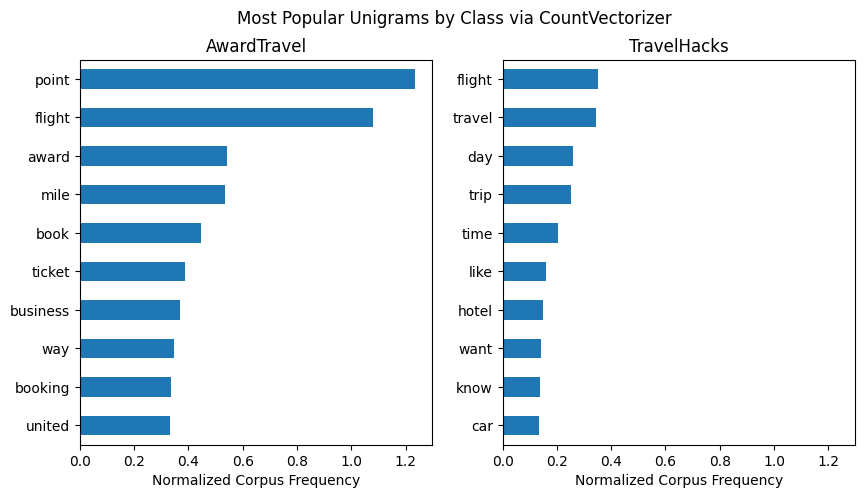

In [120]:
# adopted from class
# comparsion unigrams count using cvec for AwardTravel vs TravelHacks
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharex=True)

for i in range(2):
    check = X_train_df_cvec[y_train.reset_index(drop=True)==i]
    (check.sum().sort_values()/len(check)).tail(10).plot(kind='barh', ax=axs[i])
    axs[i].set_title(['AwardTravel', 'TravelHacks'][i])
    axs[i].set_xlabel('Normalized Corpus Frequency')
    
plt.suptitle('Most Popular Unigrams by Class via CountVectorizer');

In [26]:
# function to show frequent use unigrams, bigrams, and trigrams
# adopted from class
# credit: https://stackoverflow.com/questions/67504409/how-to-handle-out-of-vocab-words-with-bag-of-words
# credit: https://stackoverflow.com/questions/60686556/tfidf-separate-for-each-label

def plot_top_words_cvec(df, col, n, ngram, title, palette = 'flare'):
    def top_n_words(tokens, n=n, k=ngram):     
        cvec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(tokens)     
        cvec_counts = cvec.transform(tokens)     
        sum_tokens = cvec_counts.sum(axis=0)      
        tokens_freq = [(cvec_counts, sum_tokens[0, idx]) for cvec_counts, idx in cvec.vocabulary_.items()]    
        tokens_freq =sorted(tokens_freq, key = lambda x: x[1], reverse=True) 
        return tokens_freq[:n]
    tokens_df = pd.DataFrame(data=top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(6,4))
    sns.barplot(data=tokens_df, y='word', x='freq', palette=palette)
    plt.ylabel('Word')
    plt.xlabel('Frequency')
    plt.title(title, fontsize=12)

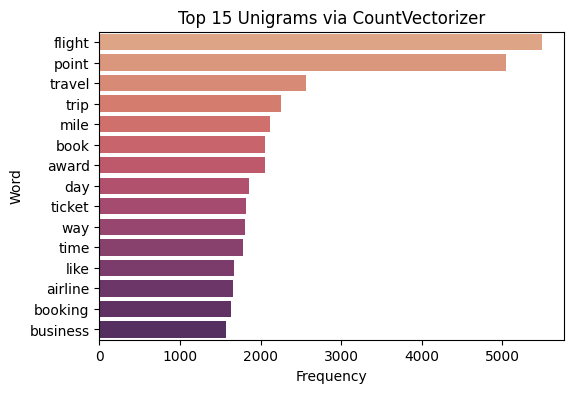

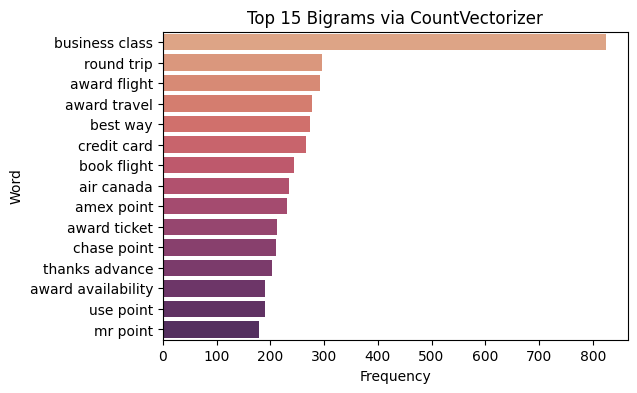

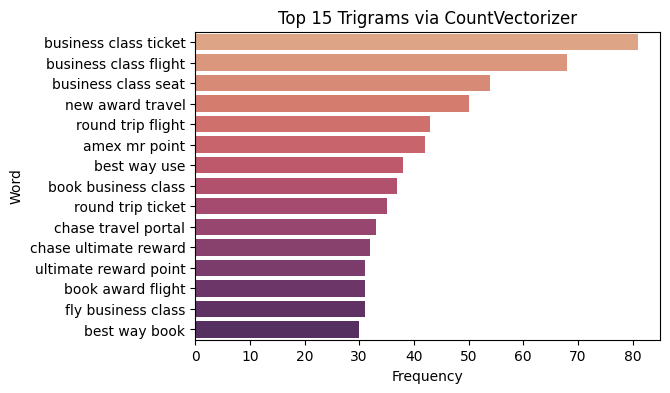

In [27]:
plot_top_words_cvec(df,'text_cleaned', 15, 1, 'Top 15 Unigrams via CountVectorizer')
plot_top_words_cvec(df,'text_cleaned', 15, 2, 'Top 15 Bigrams via CountVectorizer')
plot_top_words_cvec(df,'text_cleaned', 15, 3, 'Top 15 Trigrams via CountVectorizer')

#### TfidfVectorizer

In [112]:
# adopted from class
# Instantiate a TfidfVectorizer.
tvec = TfidfVectorizer()

# Fit the vectorizer on our corpus.
tvec.fit(X_train)

# Transform the corpus.
X_train_tvec = tvec.transform(X_train)

X_test_tvec = tvec.transform(X_test)

In [113]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
X_train_df_tvec = pd.DataFrame(X_train_tvec.todense(), 
                          columns=tvec.get_feature_names_out())

In [114]:
sys.getsizeof(X_train_cvec)  # give 48 
sys.getsizeof(X_train_cvec.todense())   # give 152 
sys.getsizeof(X_train_df_cvec)    # give 513192624 

513192624

In [115]:
X_train_df_tvec.shape

(5690, 11274)

In [116]:
train_df_tvec=X_train_df_tvec.copy()
train_df_tvec['subreddit']=y_train.values

In [117]:
check_tvec = X_train_df_tvec[y_train.reset_index(drop=True)==0]

In [118]:
check_tvec.sum().sort_values()/len(check_tvec)

liability    0.000000
library      0.000000
liberated    0.000000
lgbtq        0.000000
lexyy        0.000000
               ...   
book         0.029204
award        0.037111
mile         0.038960
flight       0.052629
point        0.071016
Length: 11274, dtype: float64

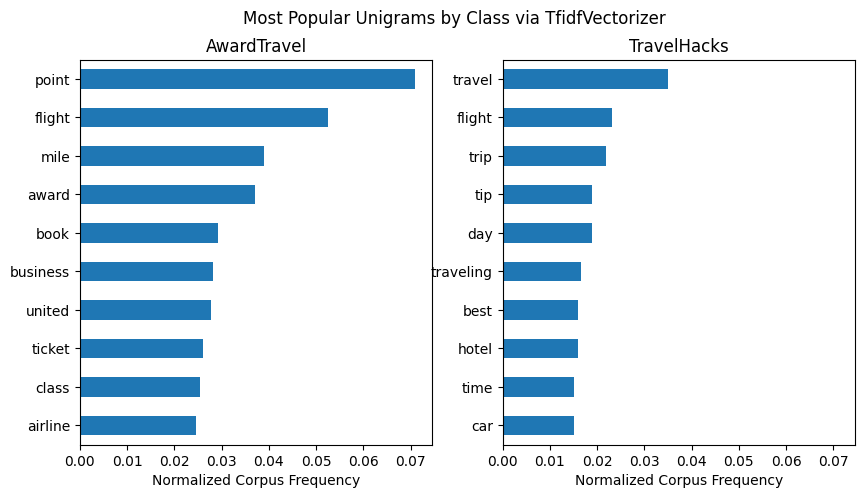

In [121]:
# adopted from class
# comparsion unigrams count using tvec for AwardTravel vs TravelHacks
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharex=True)

for j in range(2):
    check_tvec = X_train_df_tvec[y_train.reset_index(drop=True)==j]
    (check_tvec.sum().sort_values()/len(check_tvec)).tail(10).plot(kind='barh', ax=axs[j])
    axs[j].set_title(['AwardTravel', 'TravelHacks'][j])
    axs[j].set_xlabel('Normalized Corpus Frequency')
    
plt.suptitle('Most Popular Unigrams by Class via TfidfVectorizer');

In [28]:
# function to show frequent use unigrams, bigrams, and trigrams
# adopted from class
# credit: https://stackoverflow.com/questions/67504409/how-to-handle-out-of-vocab-words-with-bag-of-words

def plot_top_words_tvec(df, col, n, ngram, title, palette = 'crest'):
    def top_n_words(tokens, n=n, k=ngram):     
        tvec = TfidfVectorizer(ngram_range=(k,k), stop_words='english').fit(tokens)     
        tvec_counts = tvec.transform(tokens)     
        sum_tokens = tvec_counts.sum(axis=0)      
        tokens_freq = [(tvec_counts, sum_tokens[0, idx]) for tvec_counts, idx in tvec.vocabulary_.items()]    
        tokens_freq =sorted(tokens_freq, key = lambda x: x[1], reverse=True) 
        return tokens_freq[:n]
    tokens_df = pd.DataFrame(data=top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(6,4))
    sns.barplot(data=tokens_df, y='word', x='freq', palette=palette)
    plt.ylabel('Word')
    plt.xlabel('Frequency')
    plt.title(title, fontsize=12)

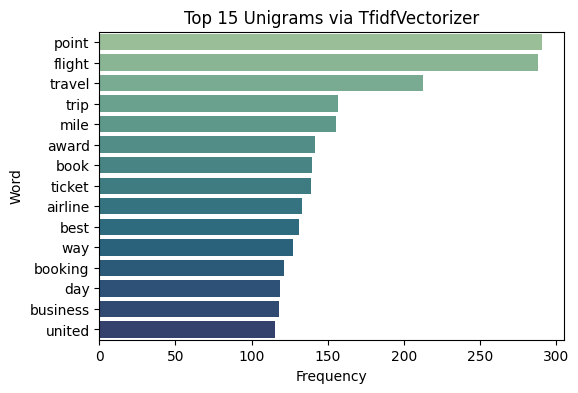

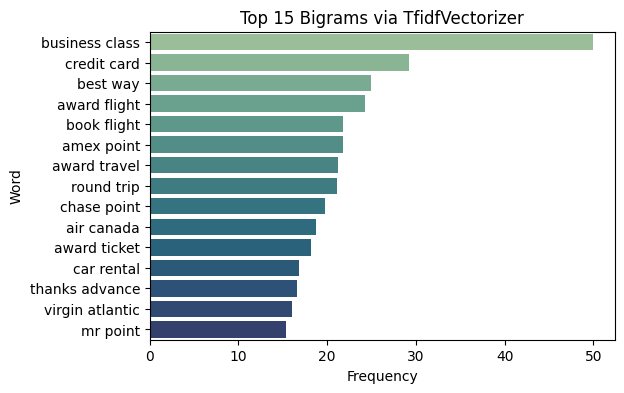

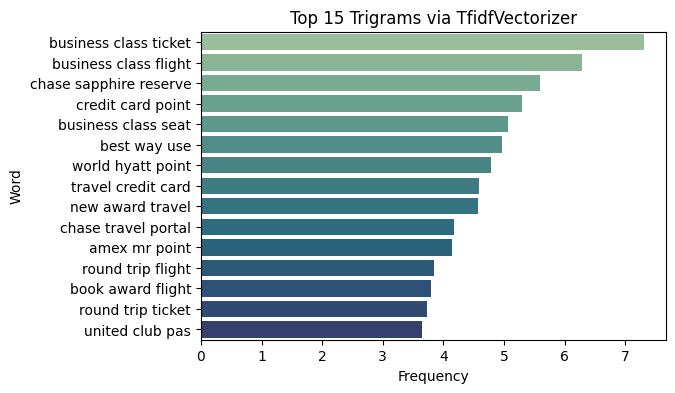

In [29]:
plot_top_words_tvec(df,'text_cleaned', 15, 1, 'Top 15 Unigrams via TfidfVectorizer')
plot_top_words_tvec(df,'text_cleaned', 15, 2, 'Top 15 Bigrams via TfidfVectorizer')
plot_top_words_tvec(df,'text_cleaned', 15, 3, 'Top 15 Trigrams via TfidfVectorizer')

### Modeling

In [40]:
# function to save score in datafram for easy comparison
# credit: https://stackoverflow.com/questions/64039664/combine-metrics-results-into-a-dataframe-python
list_of_rows = []
score_df = pd.DataFrame()

def modelscore(pipe, gs, transformer, model):
    column = pd.Series({"GridSearch": gs,
        "Transformer": transformer, #CountVectorizer,TfidfVectorizer
        "Model" : model, #Logistic, MultinomialNB
        "cross_val_score": cross_val_score(pipe, X_train, y_train, cv=5).mean(),
        "Train Score" : pipe.score(X_train,y_train),
        "Test Score" : pipe.score(X_test,y_test)
               })
    list_of_rows.append(column) 
    global score_df
    score_df = pd.DataFrame(list_of_rows)
    print(score_df)

In [41]:
#assign target and result to y and X then carry out train test split
y = df['subreddit']
X = df['text_cleaned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, stratify=y, random_state=123)

#### Model 1: CountVectorizer and LogisticRegression

In [43]:
# set a pipeline up with two stages: CountVectorizer (transformer) and LogisticRegression (estimator)
pipe_cvec_log = Pipeline([('cvec', CountVectorizer()),
                 ('log', LogisticRegression())
                ])

In [44]:
# fit
pipe_cvec_log.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('log', LogisticRegression())])

In [45]:
cross_val_score(pipe_cvec_log, X_train, y_train, cv=5)

array([0.90509666, 0.91300527, 0.89806678, 0.9059754 , 0.91300527])

In [46]:
modelscore(pipe_cvec_log, '-', 'CVect', 'Logistic')

  GridSearch Transformer     Model  cross_val_score  Train Score  Test Score
0          -       CVect  Logistic          0.90703     0.974868    0.906168


In [47]:
# check the adjustable parameters
pipe_cvec_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'cvec', 'log', 'cvec__analyzer', 'cvec__binary', 'cvec__decode_error', 'cvec__dtype', 'cvec__encoding', 'cvec__input', 'cvec__lowercase', 'cvec__max_df', 'cvec__max_features', 'cvec__min_df', 'cvec__ngram_range', 'cvec__preprocessor', 'cvec__stop_words', 'cvec__strip_accents', 'cvec__token_pattern', 'cvec__tokenizer', 'cvec__vocabulary', 'log__C', 'log__class_weight', 'log__dual', 'log__fit_intercept', 'log__intercept_scaling', 'log__l1_ratio', 'log__max_iter', 'log__multi_class', 'log__n_jobs', 'log__penalty', 'log__random_state', 'log__solver', 'log__tol', 'log__verbose', 'log__warm_start'])

In [48]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000
# Minimum number of documents needed to include token: 1, 2, 3
# Maximum number of documents needed to include token: 30%, 40%, 50%, 60%
# Check (individual tokens) and also check (individual tokens, 2-grams, 3-grams).

pipe_params = {
    'cvec__max_features': [3000, 4000, 5000],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.3, .4, .5, .6],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'cvec__stop_words' : ['english', None]
}

In [49]:
# Instantiate GridSearchCV.
gs_1 = GridSearchCV(pipe_cvec_log,
                  pipe_params,
                  cv=5)

In [50]:
gs_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('log', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.4, 0.5, 0.6, 0.7],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None]})

In [51]:
gs_1.best_params_

{'cvec__max_df': 0.4,
 'cvec__max_features': 4000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [52]:
gs_1.best_score_

0.90896309314587

In [53]:
modelscore(gs_1, '+', 'CVect', 'Logistic')

  GridSearch Transformer     Model  cross_val_score  Train Score  Test Score
0          -       CVect  Logistic         0.907030     0.974868    0.906168
1          +       CVect  Logistic         0.907733     0.975747    0.912493


#### Model 2: CountVectorizer and MultinomialNB

In [54]:
# set a pipeline up with two stages: CountVectorizer (transformer) and MultinomialNB (estimator)
pipe_cvec_nb = Pipeline([('cvec', CountVectorizer()),
                 ('nb', MultinomialNB())
                ])

In [55]:
# fit
pipe_cvec_nb.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('nb', MultinomialNB())])

In [56]:
cross_val_score(pipe_cvec_nb, X_train, y_train, cv=5)

array([0.90333919, 0.90773286, 0.88224956, 0.91300527, 0.90949033])

In [57]:
modelscore(pipe_cvec_nb, '-', 'CVect', 'Multinomial')

  GridSearch Transformer        Model  cross_val_score  Train Score  \
0          -       CVect     Logistic         0.907030     0.974868   
1          +       CVect     Logistic         0.907733     0.975747   
2          -       CVect  Multinomial         0.903163     0.929525   

   Test Score  
0    0.906168  
1    0.912493  
2    0.904586  


In [58]:
# check the adjustable parameters
pipe_cvec_nb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'cvec', 'nb', 'cvec__analyzer', 'cvec__binary', 'cvec__decode_error', 'cvec__dtype', 'cvec__encoding', 'cvec__input', 'cvec__lowercase', 'cvec__max_df', 'cvec__max_features', 'cvec__min_df', 'cvec__ngram_range', 'cvec__preprocessor', 'cvec__stop_words', 'cvec__strip_accents', 'cvec__token_pattern', 'cvec__tokenizer', 'cvec__vocabulary', 'nb__alpha', 'nb__class_prior', 'nb__fit_prior', 'nb__force_alpha'])

In [60]:
# Instantiate GridSearchCV.
gs_2 = GridSearchCV(pipe_cvec_nb,
                  pipe_params,
                  cv=5)

In [61]:
# fit
gs_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.5, 0.6, 0.7, 0.8],
                         'cvec__max_features': [1000, 2000, 3000, 4000],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None]})

In [62]:
gs_2.best_params_

{'cvec__max_df': 0.5,
 'cvec__max_features': 4000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [63]:
gs_2.best_score_

0.9050966608084359

In [64]:
modelscore(gs_2, '+', 'CVect', 'Multinomial')

  GridSearch Transformer        Model  cross_val_score  Train Score  \
0          -       CVect     Logistic         0.907030     0.974868   
1          +       CVect     Logistic         0.907733     0.975747   
2          -       CVect  Multinomial         0.903163     0.929525   
3          +       CVect  Multinomial         0.903339     0.919684   

   Test Score  
0    0.906168  
1    0.912493  
2    0.904586  
3    0.908276  


#### Model 3: TfidfVectorizer and Logistic Regression

In [65]:
pipe_tvec_log = Pipeline([('tvec', TfidfVectorizer()),
                 ('log', LogisticRegression())
                ])

In [66]:
pipe_tvec_log.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('log', LogisticRegression())])

In [67]:
cross_val_score(pipe_tvec_log, X_train, y_train, cv=5)

array([0.9288225 , 0.91476274, 0.89982425, 0.92179262, 0.92091388])

In [68]:
modelscore(pipe_tvec_log, '-', 'Tfidf', 'Logistic')

  GridSearch Transformer        Model  cross_val_score  Train Score  \
0          -       CVect     Logistic         0.907030     0.974868   
1          +       CVect     Logistic         0.907733     0.975747   
2          -       CVect  Multinomial         0.903163     0.929525   
3          +       CVect  Multinomial         0.903339     0.919684   
4          -       Tfidf     Logistic         0.917223     0.943234   

   Test Score  
0    0.906168  
1    0.912493  
2    0.904586  
3    0.908276  
4    0.921455  


In [69]:
# check the adjustable parameters
pipe_tvec_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tvec', 'log', 'tvec__analyzer', 'tvec__binary', 'tvec__decode_error', 'tvec__dtype', 'tvec__encoding', 'tvec__input', 'tvec__lowercase', 'tvec__max_df', 'tvec__max_features', 'tvec__min_df', 'tvec__ngram_range', 'tvec__norm', 'tvec__preprocessor', 'tvec__smooth_idf', 'tvec__stop_words', 'tvec__strip_accents', 'tvec__sublinear_tf', 'tvec__token_pattern', 'tvec__tokenizer', 'tvec__use_idf', 'tvec__vocabulary', 'log__C', 'log__class_weight', 'log__dual', 'log__fit_intercept', 'log__intercept_scaling', 'log__l1_ratio', 'log__max_iter', 'log__multi_class', 'log__n_jobs', 'log__penalty', 'log__random_state', 'log__solver', 'log__tol', 'log__verbose', 'log__warm_start'])

In [71]:
gs_3 = GridSearchCV(pipe_tvec_log,
                  pipe_params,
                  cv=5, verbose = 2, n_jobs = -1)

In [72]:
gs_3.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [0.01, 0.1, 1, 10, 100],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['lbfgs', 'saga'],
                         'tvec__max_features': [2000, 4000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [73]:
gs_3.best_params_

{'log__C': 1,
 'log__penalty': 'l2',
 'log__solver': 'lbfgs',
 'tvec__max_features': 6000,
 'tvec__ngram_range': (1, 2)}

In [74]:
gs_3.best_score_

0.9219683655536027

In [75]:
modelscore(gs_3, '+', 'Tfidf', 'Logistic')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

  GridSearch Transformer        Model  cross_val_score  Train Score  \
0          -       CVect     Logistic         0.907030     0.974868   
1          +       CVect     Logistic         0.907733     0.975747   
2          -       CVect  Multinomial         0.903163     0.929525   
3          +       CVect  Multinomial         0.903339     0.919684   
4          -       Tfidf     Logistic         0.917223     0.943234   
5          +       Tfidf     Logistic         0.921090     0.947452   

   Test Score  
0    0.906168  
1    0.912493  
2    0.904586  
3    0.908276  
4    0.921455  
5    0.921982  


#### Model 4: TfidfVectorizer and MultinomialNB

In [76]:
pipe_tvec_nb = Pipeline([('tvec', TfidfVectorizer()),
                 ('nb', MultinomialNB())
                ])

In [77]:
pipe_tvec_nb.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('nb', MultinomialNB())])

In [78]:
cross_val_score(pipe_tvec_nb, X_train, y_train, cv=5)

array([0.88224956, 0.88488576, 0.86203866, 0.89367311, 0.90246046])

In [79]:
modelscore(pipe_tvec_nb, '-', 'Tfidf', 'MultinomialNB')

  GridSearch Transformer          Model  cross_val_score  Train Score  \
0          -       CVect       Logistic         0.907030     0.974868   
1          +       CVect       Logistic         0.907733     0.975747   
2          -       CVect    Multinomial         0.903163     0.929525   
3          +       CVect    Multinomial         0.903339     0.919684   
4          -       Tfidf       Logistic         0.917223     0.943234   
5          +       Tfidf       Logistic         0.921090     0.947452   
6          -       Tfidf  MultinomialNB         0.885062     0.921793   

   Test Score  
0    0.906168  
1    0.912493  
2    0.904586  
3    0.908276  
4    0.921455  
5    0.921982  
6    0.885082  


In [80]:
# check the adjustable parameters
pipe_tvec_nb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tvec', 'nb', 'tvec__analyzer', 'tvec__binary', 'tvec__decode_error', 'tvec__dtype', 'tvec__encoding', 'tvec__input', 'tvec__lowercase', 'tvec__max_df', 'tvec__max_features', 'tvec__min_df', 'tvec__ngram_range', 'tvec__norm', 'tvec__preprocessor', 'tvec__smooth_idf', 'tvec__stop_words', 'tvec__strip_accents', 'tvec__sublinear_tf', 'tvec__token_pattern', 'tvec__tokenizer', 'tvec__use_idf', 'tvec__vocabulary', 'nb__alpha', 'nb__class_prior', 'nb__fit_prior', 'nb__force_alpha'])

In [82]:
gs_4 = GridSearchCV(pipe_tvec_nb,
                  pipe_params,
                  cv=5, verbose = 2, n_jobs = -1)

In [83]:
gs_4.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_features': [2000, 4000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [84]:
gs_4.best_params_

{'tvec__max_features': 6000, 'tvec__ngram_range': (1, 2)}

In [85]:
gs_4.best_score_

0.9050966608084359

In [86]:
modelscore(gs_4, '+', 'Tfidf', 'MultinomialNB')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
  GridSearch Transformer          Model  cross_val_score  Train Score  \
0          -       CVect       Logistic         0.907030     0.974868   
1          +       CVect       Logistic         0.907733     0.975747   
2          -       CVect    Multinomial         0.903163     0.929525   
3          +       CVect    Multinomial         0.903339     0.919684   
4          -       Tfidf       Logistic         0.917223     0.943234   
5          +       Tfidf       Logistic         0.921090     0.947452   
6          -       Tfidf  MultinomialNB         0.885062     0.921793   
7          +       Tfidf  MultinomialNB         0.903339     0.930931   

   Test Score  
0    0.906168  
1    0.912

#### Model 5: CountVectorizer and DecisionTreeClassifier

In [87]:
#assign target and result to y and X then carry out train test split
y = df['subreddit']
X = df['text_cleaned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, stratify=y, random_state=123)


In [88]:
pipe_dtc = Pipeline([('cvec', CountVectorizer()),
                 ('dtc', DecisionTreeClassifier())
                ])

In [89]:
# fit
pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('dtc', DecisionTreeClassifier())])

In [90]:
cross_val_score(pipe_dtc, X_train, y_train, cv=5)

array([0.8884007 , 0.89982425, 0.87609842, 0.89455185, 0.88137083])

In [91]:
modelscore(pipe_dtc, '-', 'CVect', 'DecisionTree')

  GridSearch Transformer          Model  cross_val_score  Train Score  \
0          -       CVect       Logistic         0.907030     0.974868   
1          +       CVect       Logistic         0.907733     0.975747   
2          -       CVect    Multinomial         0.903163     0.929525   
3          +       CVect    Multinomial         0.903339     0.919684   
4          -       Tfidf       Logistic         0.917223     0.943234   
5          +       Tfidf       Logistic         0.921090     0.947452   
6          -       Tfidf  MultinomialNB         0.885062     0.921793   
7          +       Tfidf  MultinomialNB         0.903339     0.930931   
8          -       CVect   DecisionTree         0.886819     0.999649   

   Test Score  
0    0.906168  
1    0.912493  
2    0.904586  
3    0.908276  
4    0.921455  
5    0.921982  
6    0.885082  
7    0.907222  
8    0.885082  


### Model Evaluation

In [92]:
def c_matrix(model, X_test):
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)            # calculate predictions
    cm = confusion_matrix(y_test, y_pred)    # defining the confusion matrix
    tn, fp, fn, tp = cm.ravel()               # assigning the elements of the confusion matrix to variables
    
    spec = tn / (tn + fp)                     # calculate the specificity
    sens = tp / (tp + fn)                     # calculate the sensitivity
    
    print('Specificity:', spec)
    print('Sensitivity:', sens)
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    
    return pd.DataFrame(cm, 
                        columns = ['Pred AwardTravel','Pred TravelHack'], 
                        index = ['Act AwardTravel', 'Act TravelHack'])

In [93]:
def display_matrix(model, X_test, y_test):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d');

--- CountVectorizer and LogisticRegression ---
Specificity: 0.8709677419354839
Sensitivity: 0.9423076923076923
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       961
           1       0.88      0.94      0.91       936

    accuracy                           0.91      1897
   macro avg       0.91      0.91      0.91      1897
weighted avg       0.91      0.91      0.91      1897



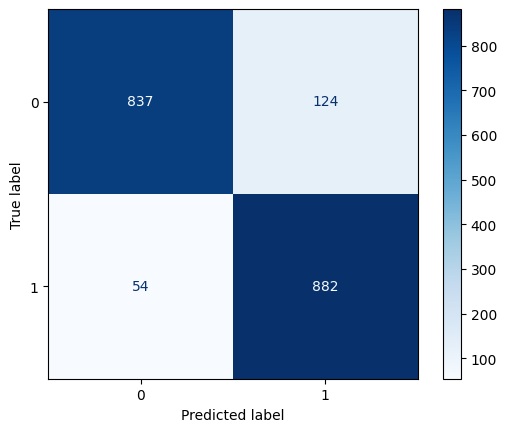

In [94]:
print(f"--- CountVectorizer and LogisticRegression ---")
c_matrix(pipe_log, X_test)

display_matrix(pipe_log, X_test, y_test)

Grid Search of CountVectorizer and LogisticRegression
Specificity: 0.8803329864724245
Sensitivity: 0.9455128205128205
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       961
           1       0.89      0.95      0.91       936

    accuracy                           0.91      1897
   macro avg       0.91      0.91      0.91      1897
weighted avg       0.91      0.91      0.91      1897



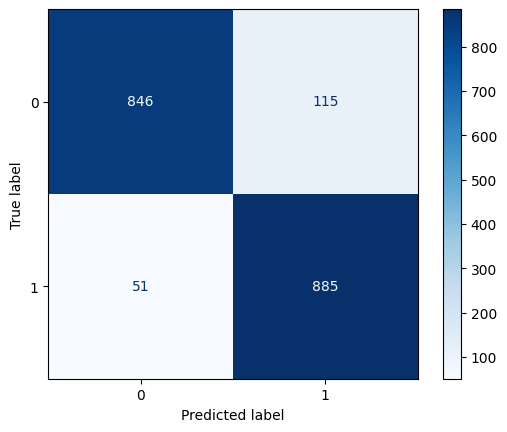

In [95]:
print("Grid Search of CountVectorizer and LogisticRegression")
c_matrix(gs_1, X_test)

display_matrix(gs_1, X_test, y_test)

CountVectorizer and MultinomialNB
Specificity: 0.9427679500520292
Sensitivity: 0.8653846153846154
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       961
           1       0.94      0.87      0.90       936

    accuracy                           0.90      1897
   macro avg       0.91      0.90      0.90      1897
weighted avg       0.91      0.90      0.90      1897



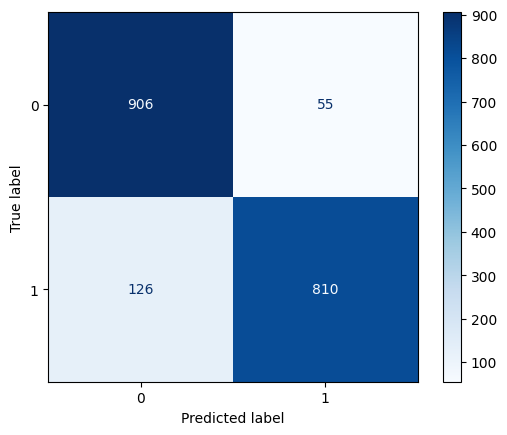

In [96]:
print(f"CountVectorizer and MultinomialNB")
c_matrix(pipe_nb, X_test)

display_matrix(pipe_nb, X_test, y_test)

Grid Search of CountVectorizer and MultinomialNB
Specificity: 0.9157127991675338
Sensitivity: 0.9006410256410257
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       961
           1       0.91      0.90      0.91       936

    accuracy                           0.91      1897
   macro avg       0.91      0.91      0.91      1897
weighted avg       0.91      0.91      0.91      1897



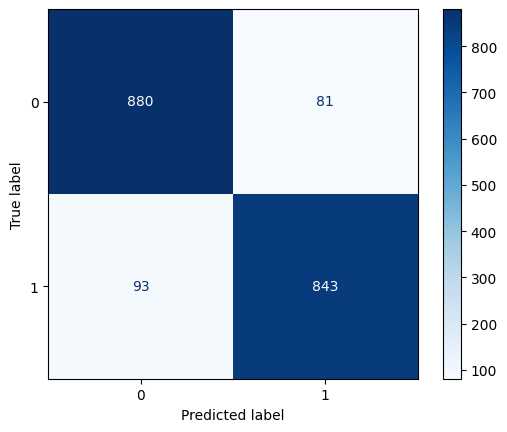

In [97]:
print("Grid Search of CountVectorizer and MultinomialNB")
c_matrix(gs_2, X_test)

display_matrix(gs_2, X_test, y_test)

TfidfVectorizer and LogisticRegression
Specificity: 0.8959417273673257
Sensitivity: 0.9476495726495726
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       961
           1       0.90      0.95      0.92       936

    accuracy                           0.92      1897
   macro avg       0.92      0.92      0.92      1897
weighted avg       0.92      0.92      0.92      1897



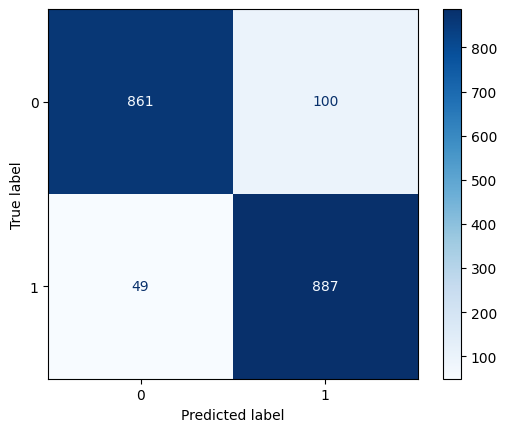

In [98]:
print(f"TfidfVectorizer and LogisticRegression")
c_matrix(pipe_tvec_log, X_test)

display_matrix(pipe_tvec_log, X_test, y_test)

Grid Search of TfidfVectorizer and LogisticRegression
Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\skyne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalt

Specificity: 0.8959417273673257
Sensitivity: 0.9487179487179487
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       961
           1       0.90      0.95      0.92       936

    accuracy                           0.92      1897
   macro avg       0.92      0.92      0.92      1897
weighted avg       0.92      0.92      0.92      1897



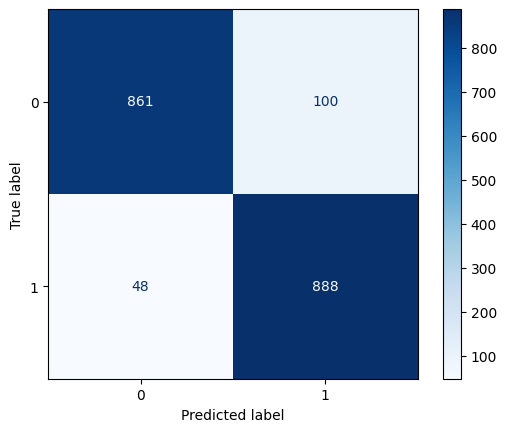

In [99]:
print("Grid Search of TfidfVectorizer and LogisticRegression")
c_matrix(gs_3, X_test)
display_matrix(gs_3, X_test, y_test)

TfidfVectorizer and MultinomialNB
Specificity: 0.9562955254942768
Sensitivity: 0.811965811965812
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       961
           1       0.95      0.81      0.87       936

    accuracy                           0.89      1897
   macro avg       0.89      0.88      0.88      1897
weighted avg       0.89      0.89      0.88      1897



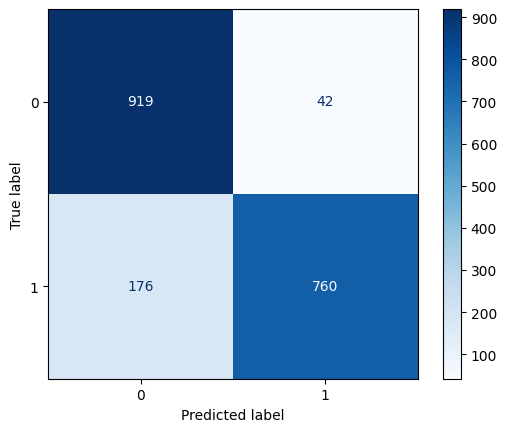

In [100]:
print(f"TfidfVectorizer and MultinomialNB")
c_matrix(pipe_tvec_nb, X_test)
display_matrix(pipe_tvec_nb, X_test, y_test)

Grid Search of TfidfVectorizer and MultinomialNB
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Specificity: 0.9177939646201873
Sensitivity: 0.8963675213675214
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       961
           1       0.91      0.90      0.91       936

    accuracy                           0.91      1897
   macro avg       0.91      0.91      0.91      1897
weighted avg       0.91      0.91      0.91      1897



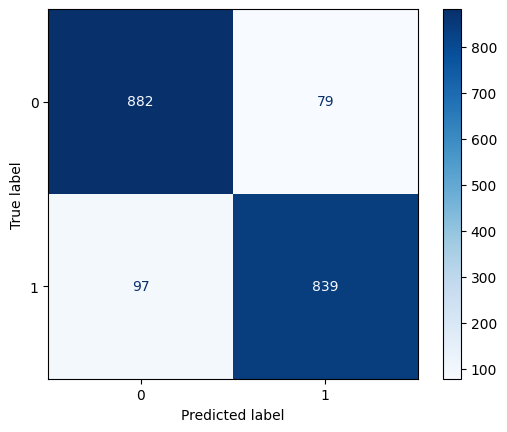

In [101]:
print("Grid Search of TfidfVectorizer and MultinomialNB")
c_matrix(gs_4, X_test)
display_matrix(gs_4, X_test, y_test)

CountVectorizer and DecisionTree
Specificity: 0.8959417273673257
Sensitivity: 0.8782051282051282
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       961
           1       0.89      0.88      0.88       936

    accuracy                           0.89      1897
   macro avg       0.89      0.89      0.89      1897
weighted avg       0.89      0.89      0.89      1897



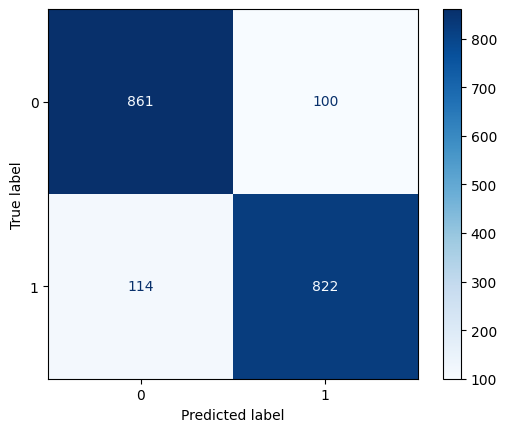

In [102]:
print(f"CountVectorizer and DecisionTree")
c_matrix(pipe_dtc, X_test)

display_matrix(pipe_dtc, X_test, y_test)

All 9 models tested have very similar results except Cvec+logestic and and Cvec+DecsisionTress. Cvec+logestic shows the specificity of 87% and sensitivity of 94%, which is sligthly better than Cvec+DecsisionTress (specificity of 87% and sensitivity of 87%). The cvec+MultinomialNB with gridsearch is the best performance model (91% accuracy, specificity, and sensitivity).

#### Receiver operating characteristic(ROC) curves

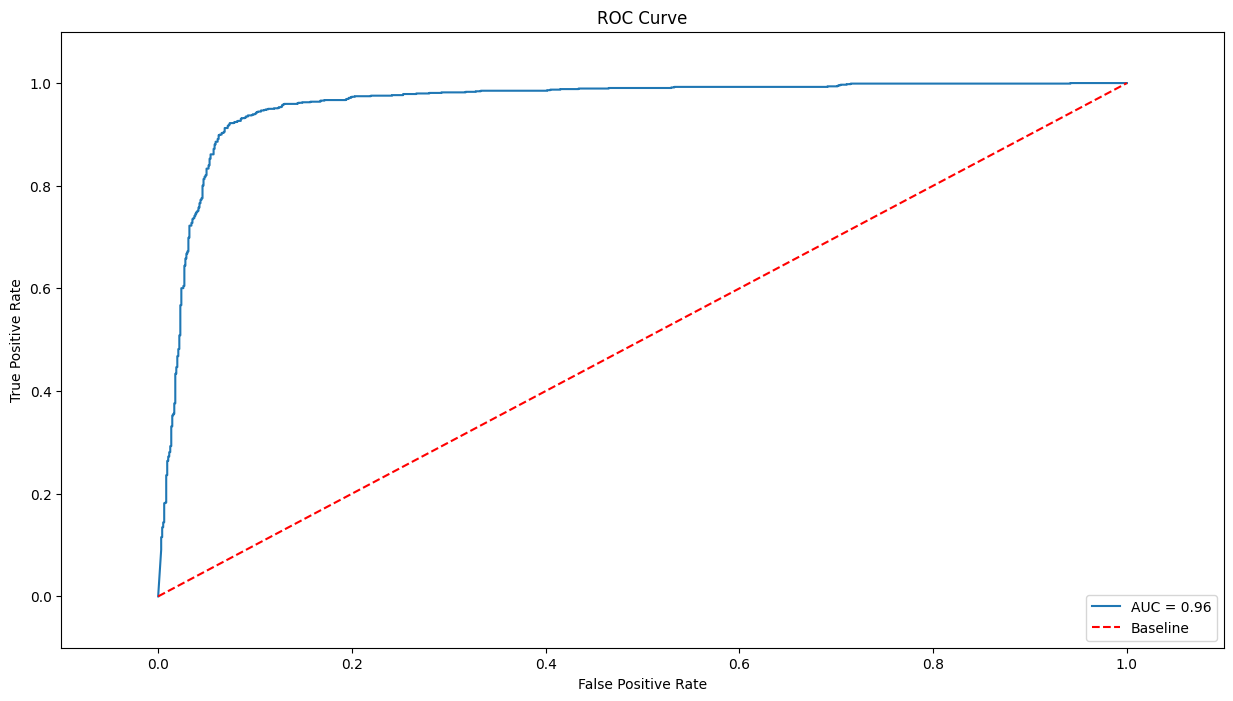

In [103]:
# adopted from class
plt.figure(figsize=(15,8))

pipe_nb.fit(X_train, y_train)
y_preds = pipe_nb.predict_proba(X_test)

preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)  # false-positive-rate vs true-positive-rate

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')

plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# add threshold
plt.plot([0,1],[0,1],'r--', label='Baseline')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right'); 

The ROC curve shows the tradeoff between sensitivity and specificity. The larger of the area under curve (AUC) means better accuracy. 

### Conclusion and Next Steps
r/TravelHacks and r/AwardTravel is somewhat similar because awardtravel is type of travel hacks. From the frequent bigrams and trigrams, r/awardtravel is more about points, flight tickets, and airline company, while r/travelhacks is more about rental car and trip planning. According to the Sentiment Analysis, r/AwardTravel has a slightly higher sentiment score than r/TravelHacks. They MultinomialNB model with countvector and gridsearch is the best model to make prediction with accuracy of 91%. 
From this study, r/awardtravel may be appealing for the customers who want to redeem points for their trips, while r/TravelHacks may be great for customers whose trips involved car rentals. 
One of the major limitions for my model is that all numbers were removed during text cleaning; therefore, it will be hard to provide any features related to numbers such as cost, distance, and number of points for award redeemtion.   